# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error as mae,  
    root_mean_squared_error as rmse,  
    classification_report, 
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


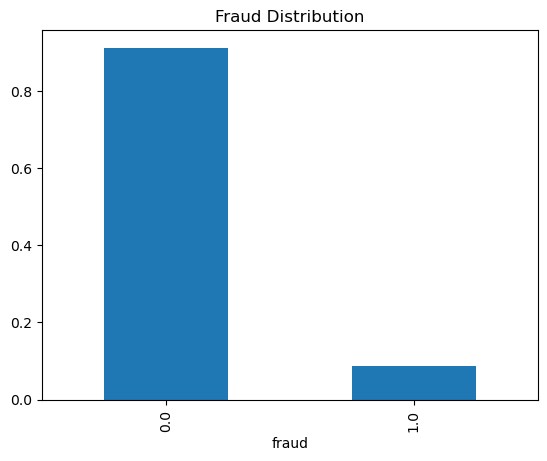

In [4]:
fraud_counts = fraud["fraud"].value_counts(normalize=True)
print(fraud_counts) 
fraud_counts.plot(kind="bar")
plt.title("Fraud Distribution")
plt.show()

- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [7]:
X = fraud.drop(columns=["fraud"])
y = fraud["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler().fit(X_train) 

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display (X_train_scaled.head())
display( X_test_scaled.head())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.147170,-0.181191,-0.588185,0.366618,1.361704,-0.334593,0.732884
1,-0.091174,-0.168859,-0.415653,0.366618,1.361704,-0.334593,0.732884
2,-0.334813,-0.100009,0.612860,0.366618,1.361704,-0.334593,0.732884
3,-0.317543,-0.143624,-0.551591,0.366618,-0.734374,-0.334593,0.732884
4,0.077164,-0.126583,-0.590736,0.366618,-0.734374,-0.334593,-1.364472


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.393937,-0.141433,-0.523885,-2.727632,-0.734374,-0.334593,0.732884
1,-0.398819,-0.182690,0.462906,-2.727632,-0.734374,-0.334593,0.732884
2,-0.347528,-0.170524,-0.087760,0.366618,-0.734374,-0.334593,-1.364472
3,-0.073922,-0.189852,3.432119,0.366618,-0.734374,-0.334593,-1.364472
4,-0.357425,-0.125838,0.072892,0.366618,-0.734374,-0.334593,-1.364472


R² score (Train): 0.95885875
R² score (Test): 0.95875
MAE (Test): 0.04125
RMSE (Test): 0.203100960115899

Confusion Matrix:
 [[181283   1274]
 [  6976  10467]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



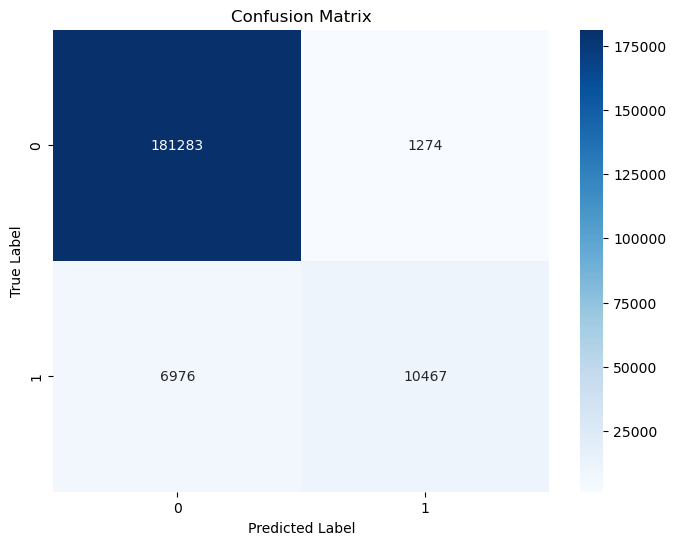

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print("R² score (Train):", log_reg.score(X_train_scaled, y_train))
print("R² score (Test):", log_reg.score(X_test_scaled, y_test))
print("MAE (Test):", mae(y_test, y_pred))
print("RMSE (Test):", rmse(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- True Negatives (181,283): Non-fraud transactions correctly classified as non-fraud.
- False Positives (1,274): Number of non-fraud transactions incorrectly classified as fraud.
- False Negatives (6,976): Number of fraud transactions incorrectly classified as non-fraud.
- True Positives (10,467): Number of fraud transactions correctly classified as fraud.

Precision:
- 96% → 4% of non-fraud classifications are actually fraud.
- 89% → 11% of fraud classifications are actually non-fraud.
  
Recall:
- 99% → Almost all non-fraud cases are correctly identified.
- 60% → 40% of fraud cases are missed (high False Negatives).

F1-score:
- 98% for non-fraud
- 72% for fraud

Accuracy:
- 96% overall correctness.

Key Insights
- High Overall Accuracy (96%) – The model performs well overall, but accuracy alone isn’t enough in fraud detection due to class imbalance.
- Recall for Fraud is Low (60%) – 40% of fraud cases are not being detected, which could be risky in real-world fraud detection scenarios.
- Precision for Fraud is 89% – Meaning that 11% of the flagged fraud cases are actually legitimate.
- High False Negatives (6,976 cases) – The model is still missing a large number of fraud cases, which could have serious consequences.

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

Training Data Class Distribution After Oversampling:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Confusion Matrix:
 [[170347  12210]
 [   852  16591]]

Classification Report After Oversampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



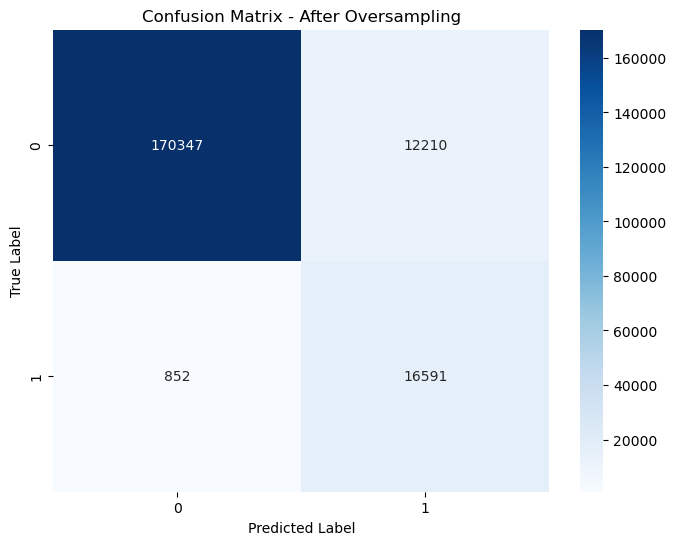

In [13]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

print("Training Data Class Distribution After Oversampling:")
print(pd.Series(y_train_ros).value_counts(normalize=True) * 100)

model_ros = LogisticRegression(random_state=42, max_iter=1000)
model_ros.fit(X_train_ros, y_train_ros)

y_pred_ros = model_ros.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ros))
print("\nClassification Report After Oversampling:")
print(classification_report(y_test, y_pred_ros))

plt.figure(figsize=(8, 6))
cm_ros = confusion_matrix(y_test, y_pred_ros)
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After Oversampling')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

Training Data Class Distribution After Undersampling:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Confusion Matrix:
 [[170295  12262]
 [   842  16601]]

Classification Report After Undersampling:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



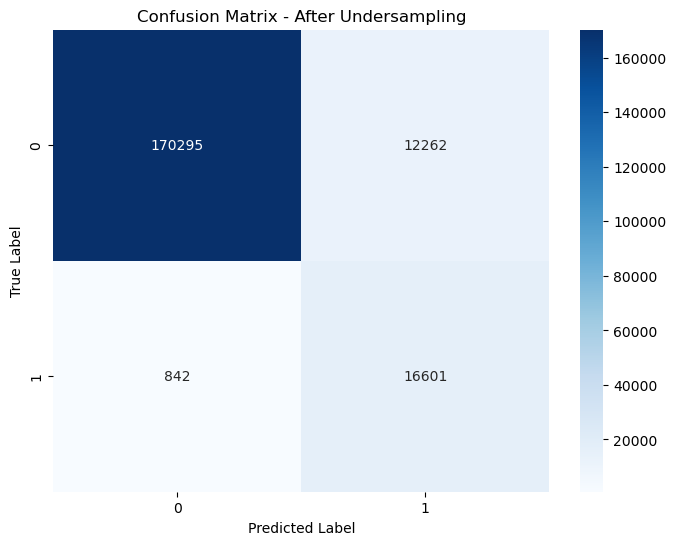

In [15]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

print("Training Data Class Distribution After Undersampling:")
print(pd.Series(y_train_rus).value_counts(normalize=True) * 100)

model_rus = LogisticRegression(random_state=42, max_iter=1000)
model_rus.fit(X_train_rus, y_train_rus)

y_pred_rus = model_rus.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))
print("\nClassification Report After Undersampling:")
print(classification_report(y_test, y_pred_rus))

plt.figure(figsize=(8, 6))
cm_rus = confusion_matrix(y_test, y_pred_rus)
sns.heatmap(cm_rus, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After Undersampling')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Training Data Class Distribution After SMOTE:
fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Confusion Matrix:
 [[170334  12223]
 [   848  16595]]

Classification Report After SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



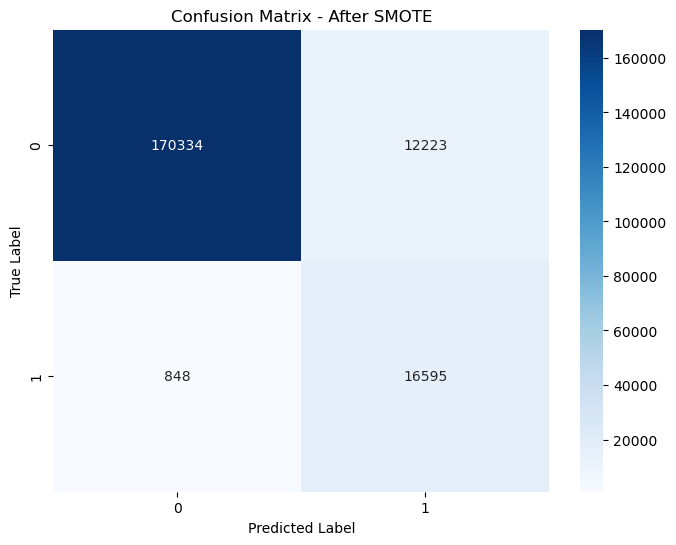

In [17]:
smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Training Data Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True) * 100)

model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report After SMOTE:")
print(classification_report(y_test, y_pred_smote))

plt.figure(figsize=(8, 6))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After SMOTE')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Comparison**

### **1. Original Logistic Regression (No Resampling)**

#### **Classification Report**
| Class | Precision | Recall | F1-Score | Support |
|--------|------------|--------|-----------|---------|
| **0 (Non-Fraud)** | 0.96 | 0.99 | 0.98 | 182,557 |
| **1 (Fraud)** | 0.89 | 0.60 | 0.72 | 17,443 |
| **Accuracy** | **96%** |  |  | 200,000 |
  
- High **precision (0.89)** for fraud cases but **low recall (0.60)** missing many fraud cases.  
- Many fraud cases are **missed** (high false negatives) although overall **accuracy** is high (96%).  

---

### **2. After Applying Resampling Techniques**
Each resampling method resulted in **similar classification reports** but **slightly different confusion matrices**.

#### **Oversampling**

#### **Classification Report**
| Class | Precision | Recall | F1-Score | Support |
|--------|------------|--------|-----------|---------|
| **0 (Non-Fraud)** | 1.00 | 0.93 | 0.96 | 182,557 |
| **1 (Fraud)** | 0.58 | 0.95 | 0.72 | 17,443 |
| **Accuracy** | **93%** |  |  | 200,000 |

---

#### **Undersampling**

#### **Classification Report**
| Class | Precision | Recall | F1-Score | Support |
|--------|------------|--------|-----------|---------|
| **0 (Non-Fraud)** | 1.00 | 0.93 | 0.96 | 182,557 |
| **1 (Fraud)** | 0.58 | 0.95 | 0.72 | 17,443 |
| **Accuracy** | **93%** |  |  | 200,000 |

---

#### **SMOTE**

### **Classification Report**
| Class | Precision | Recall | F1-Score | Support |
|--------|------------|--------|-----------|---------|
| **0 (Non-Fraud)** | 1.00 | 0.93 | 0.96 | 182,557 |
| **1 (Fraud)** | 0.58 | 0.95 | 0.72 | 17,443 |
| **Accuracy** | **93%** |  |  | 200,000 |

---

#### **What Improved?**
- **Recall for fraud cases increased from 0.60 → 0.95**  
  → More fraud cases were caught.  

#### **What Got Worse?**
- **Precision for fraud cases dropped from 0.89 → 0.58**  
  → More false positives (non-fraud cases misclassified as fraud).  

#### **Why are Confusion Matrices Different, but Reports the Same?**
- Small variations in confusion matrices are due to **randomness in resampling**.  
- However, since the overall proportion of correct/incorrect classifications remains similar, **classification reports show the same metrics**.

---

#### **Best Approach?**
| Scenario | Best Approach |
|-----------|--------------|
| If **catching more fraud is the priority** | **Use resampling** (Higher Recall - 95%) |
| If **reducing false positives is the priority** | **Use original model** (Higher Precision - 89%) |

